# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [3]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [4]:
kmeans = KMeans(n_clusters = 8).fit_transform(X)

silhouette_score(kmeans, labels = y)

0.18622433514192877

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [5]:
kmeans = KMeans(n_clusters = 5).fit_transform(X)

silhouette_score(kmeans, labels = y)

0.18640532291605164

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [6]:
kmeans = KMeans(n_clusters = 3).fit_transform(X)

silhouette_score(kmeans, labels = y)

0.18837864346566538

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

<bound method Visualizer.poof of KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c25921fd0>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)>

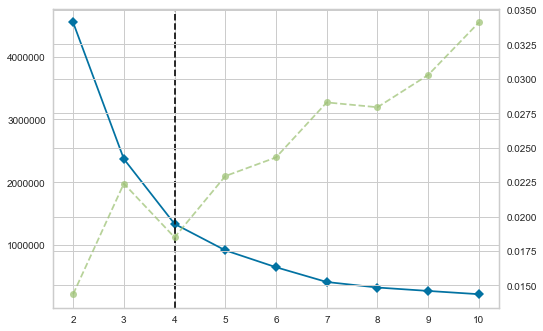

In [7]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(
    KMeans().fit(X), # give it a fitted model
    k = (2, 11) # range of values for k, minimum is 2,
)

visualizer.fit(X)
visualizer.poof # so four is the optimal number of clusters

In [8]:
kmeans = KMeans(n_clusters = 4).fit_transform(X)

silhouette_score(kmeans, labels = y) # this value of 0.1885 is Higher than the other silhouette scores!!!

0.18786588017988112

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

<bound method Visualizer.poof of KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a23113b90>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)>

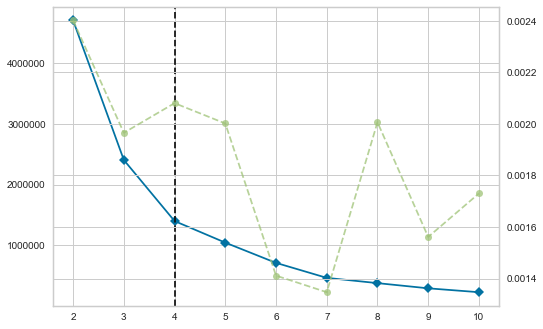

In [9]:
# from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering


visualizer = KElbowVisualizer(
    AgglomerativeClustering().fit(X), # give it a fitted model
    k = (2, 11) # range of values for k, minimum is 2,
)

visualizer.fit(X)
visualizer.poof # so four is the optimal number of clusters, just like KMeans

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [10]:
kmeans = KMeans(n_clusters = 4).fit(X)
agglom = AgglomerativeClustering(n_clusters = 4).fit(X)

models = ['kmeans', 'agglom']

import seaborn as sns

In [11]:
X.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

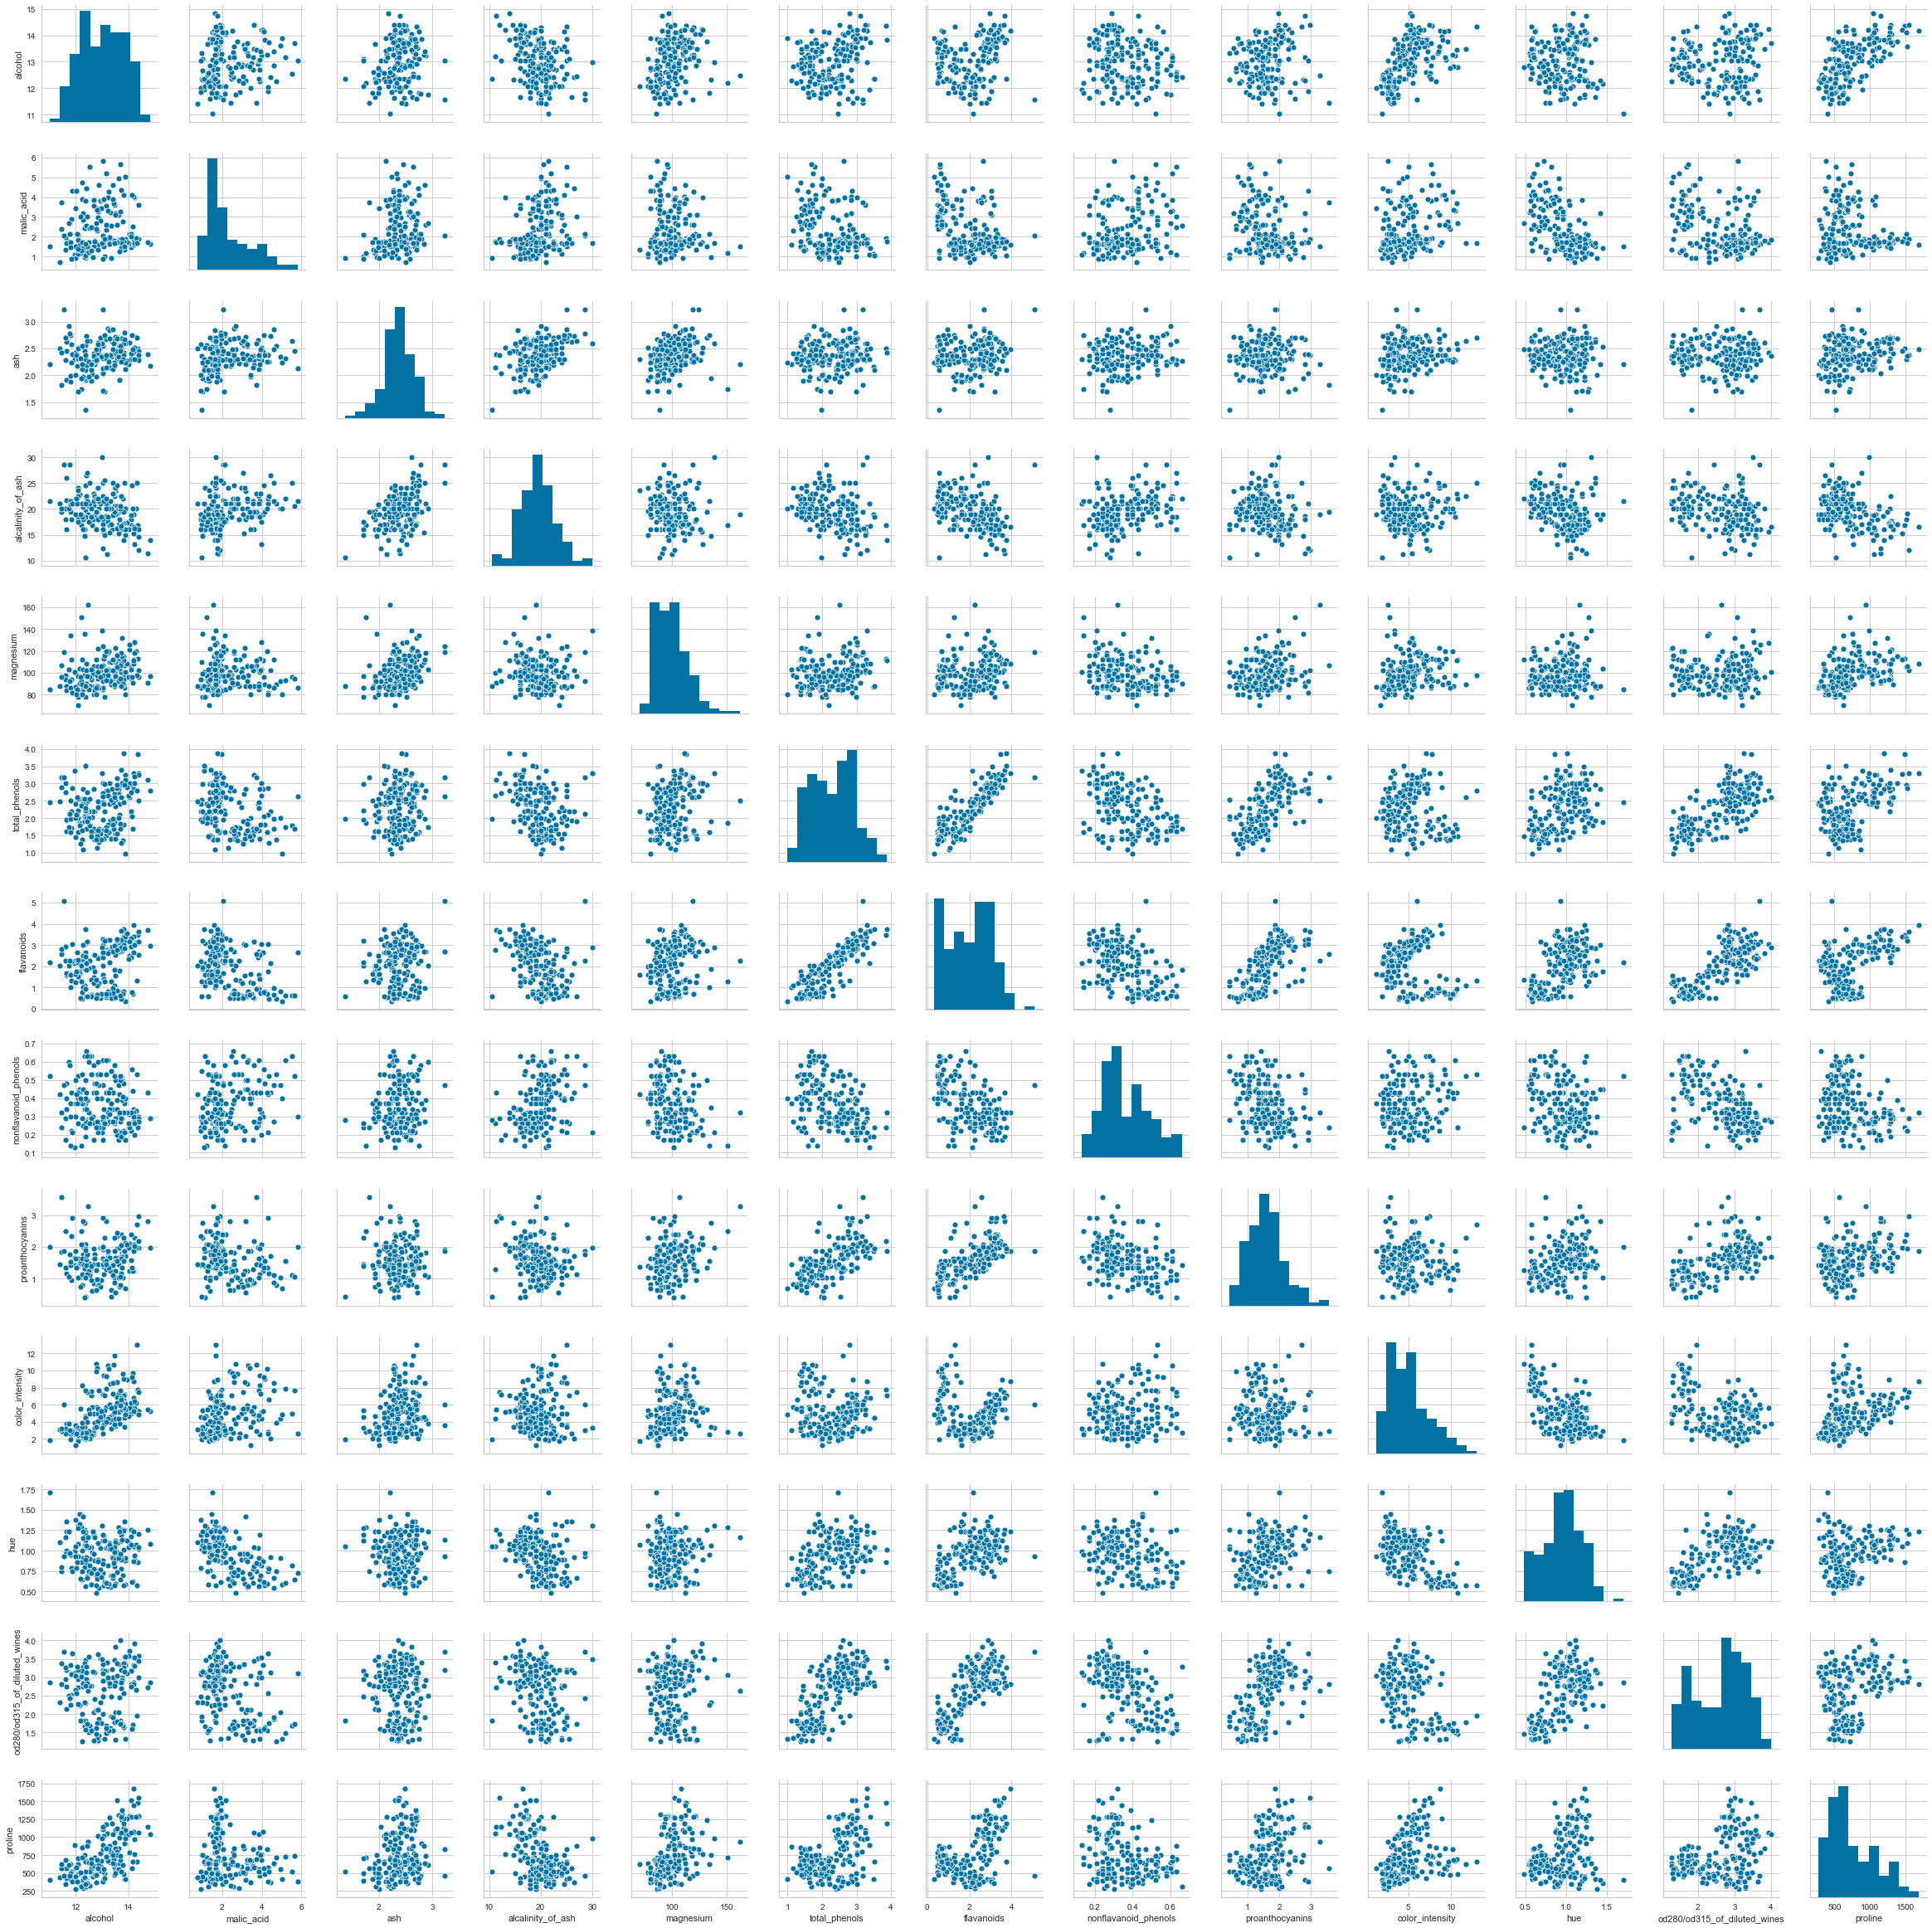

In [12]:
sns.pairplot(X) # scatter matrix of each column compared to each of the others, but not having been clustered

In [14]:
# sns.pairplot(pd.DataFrame(kmeans)) # still getting same error: ValueError: DataFrame constructor not properly called!

In [16]:
# y_pred = kmeans.predict(X)

# # from math import factorial for when we look a scatter matrix

# fig, ax = (1, factorial(13))

# # plt.figure(figsize=(6,6))

# plt.scatter(
#     X['alcohol'],
#     X['malic_acid'],
#     c = y_pred,
#     )

# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.75)

# plt.show() # this is only looking at Alcohol Vs. Malic Acid for KMeans

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [17]:
from statsmodels.multivariate.pca import PCA
from sklearn.preprocessing import StandardScaler

scaled_X = pd.DataFrame( # create a new df out of...
    StandardScaler().fit_transform(X), # initalize the Scaler, then fit_transform the data
    columns = X.columns, # add the column names from the original 
)

reduced = PCA(scaled_X, ncomp = 2).factors

reduced

,comp_0,comp_1
0,-0.114600,0.068468
1,-0.076341,-0.015814
2,-0.086958,0.048911
3,-0.129813,0.130744
4,-0.034860,0.041259
...,...,...
173,0.116458,0.105126
174,0.089902,0.083351
175,0.092524,0.130958
176,0.082476,0.108971


## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [18]:
from sklearn.manifold import TSNE

stochast_df = pd.DataFrame(TSNE(perplexity = 5).fit_transform(reduced)) # throw that multi-dim array into a df
stochast_df.head()

,0,1
0,20.491777,-30.383999
1,-15.944397,-30.396204
2,10.014475,-38.808418
3,26.792686,-27.897562
4,-7.603057,-49.754025


In [20]:
stochast_df[1]

0     -30.383999
1     -30.396204
2     -38.808418
3     -27.897562
4     -49.754025
         ...    
173    11.664699
174    16.179296
175     6.106434
176    10.466109
177     4.840688
Name: 1, Length: 178, dtype: float32

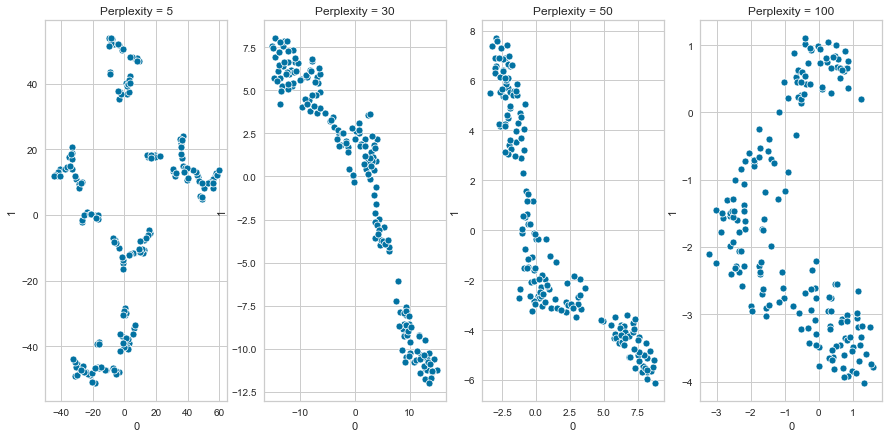

In [24]:

fig, ax = plt.subplots(1, 4, figsize = (15, 7))
for i, p in enumerate([5, 30, 50, 100]):
    tsne = TSNE(perplexity = p) # create an instance of the model for each of the p in the loop above
    stochast_df = pd.DataFrame(tsne.fit_transform(reduced)) # throw that multi-dim array into a df
    
    sns.scatterplot(
        data = stochast_df,
        x = stochast_df[0],
#         x = '0',
        y = stochast_df[1],
#         y = '1',
#         hue = pd.Series(data['target']).unique(),
        ax = ax[i],
    )
    
    ax[i].set_title(f'Perplexity = {p}')
    
plt.show()